# Step 0: Importing the libraries

In [1]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
random.seed(10)

# Step 1: Defining the area

In [2]:
center_x = 0
center_y = 0
center_z = 0

radius  = 5000

print("Total area is = " + str(radius*radius*math.pi))

Total area is = 78539816.33974482


# Step 2: FSS class

In [3]:
# Creating the FSS class
class FSS:
  def __init__(self, FSS_x, FSS_y, FSS_z):
    self.FSS_x = FSS_x
    self.FSS_y = FSS_y
    self.FSS_z = FSS_z


  def FSS_co_ordinate(self):
    print("Co-ordinate of FSS is = " + str(self.FSS_x) + "," + str(self.FSS_y) + "," + str(self.FSS_z))
    

    
# Creating an FSS object
fss1 = FSS(0,0,0)
fss1.FSS_co_ordinate()

Co-ordinate of FSS is = 0,0,0


# Step 3: BS Class

In [4]:
class BS:
  def __init__(self, radius, max_height, carr_freq):
    self.radius = radius
    self.max_height = max_height
    self.carr_freq = carr_freq

  def BS_random_co_ordinates(self):

    BS_x = random.randint(-4000,4000) + 1000*random.random()
    BS_y = random.randint(-4000,4000) + 1000*random.random()
    BS_z = random.randint(0,35)
    
    return BS_x, BS_y, BS_z
 
  def UE_random_co_ordinates(self):
    UE_x = random.randint(-4000,4000) + 1000*random.random()
    UE_y = random.randint(-4000,4000) + 1000*random.random()
    UE_z = random.uniform (0,1.5)
    
    return UE_x, UE_y, UE_z

BS_X= []
BS_Y= []
BS_Z= []
for i in range (4):
    bs1 = BS(radius, max_height=35, carr_freq=12e3)
    x,y,z = bs1.BS_random_co_ordinates()
    BS_X.append(x)
    BS_Y.append(y)
    BS_Z.append(z)
    print ("Bs Co-ordinates=" +str (x)+ "," + str(y)+ "," + str(z))
print(BS_X,BS_Y,BS_Z)

UE_X= []
UE_Y= []
UE_Z= []
for i in range (10):
    ue1 = BS(radius, max_height=1.5, carr_freq=12e3)
    x,y,z = ue1.UE_random_co_ordinates()
    UE_X.append(x)
    UE_Y.append(y)
    UE_Z.append(z)
    print("UE Co-ordinates=" +str (x)+ "," + str(y)+ "," + str(z))
print(UE_X,UE_Y,UE_Z)

Bs Co-ordinates=712.5850652820546,531.0913011344704,13
Bs Co-ordinates=602.3212513573201,3023.520661454443,10
Bs Co-ordinates=-3198.3306403600754,-1238.9106532186518,23
Bs Co-ordinates=-3214.6037997293397,-2260.809389031815,24
[712.5850652820546, 602.3212513573201, -3198.3306403600754, -3214.6037997293397] [531.0913011344704, 3023.520661454443, -1238.9106532186518, -2260.809389031815] [13, 10, 23, 24]
UE Co-ordinates=-266.38178209328487,1791.3211104931768,0.26200588441485334
UE Co-ordinates=-855.1536799476489,-2454.071577192561,1.290073714953809
UE Co-ordinates=-1069.6118395950812,1399.2429935653554,0.8743973337567055
UE Co-ordinates=-1936.027472950866,4617.58824234352,0.8045177463383852
UE Co-ordinates=3222.1962445391882,-758.3100486622589,0.6759345021400335
UE Co-ordinates=-85.00582387314945,1112.6882844274332,0.7528755309777584
UE Co-ordinates=3123.2989686860415,-379.6259974470372,0.047620033807346474
UE Co-ordinates=-715.0171355703682,1461.0347727349679,1.3864015175602482
UE Co-ord

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot

In [6]:
BS_X=np.array(BS_X)
BS_Y=np.array(BS_Y)
BS_Z=np.array(BS_Z)

UE_X=np.array(UE_X)
UE_Y=np.array(UE_Y)
UE_Z=np.array(UE_Z)


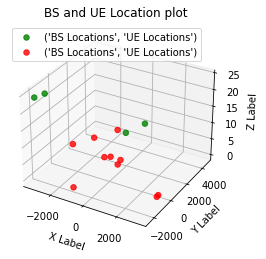

In [7]:
groups = ("BS Locations", "UE Locations")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(BS_X,BS_Y,BS_Z,alpha=0.8, s=30,color= 'green',label=groups)
ax.scatter(UE_X,UE_Y,UE_Z,alpha=0.8, s=30,color= 'red',label=groups)
plt.legend(loc=2)
plt.title('BS and UE Location plot')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [8]:
pathloss_UMa=np.empty([0])
pathloss_UMi=np.empty([0])
pathloss_RMa=np.empty([0])
distance_UMa=np.empty([0])
distance_UMi=np.empty([0])
distance_RMa=np.empty([0])

In [9]:
  def path_loss_UMi(BS_X,BS_Y,BS_Z,UE_X,UE_Y,UE_Z):
##UMi
##LOS,SF=4:

##(10m<=d_2D)<=D_BP:
    h=5
    d_2D=math.sqrt(((BS_X-UE_X)**2)+((BS_Y- UE_Y)**2)+((BS_Z-UE_Z)**2))
    hBs=10
    fc=12e3
    d_3D=math.sqrt(hBs**2+d_2D**2)
    PL1umi=32.4+21*math.log(d_3D)+20*math.log(fc)
    
##(D_BP<=d_2D)<=5000m:
    hBs=10
    hUT=1.5
    hE=1
    hBs1=hBs-hE
    hUT1=hUT-hE
    c=3*10**8
    D_BP= (4*hBs1*hUT1*fc)/c
    PL2umi=32.4+40*math.log(d_3D)+20*math.log(fc)-9.5*math.log((D_BP)**2+(hBs-hUT)**2)
    
    if 10 <=d_2D and d_2D<=D_BP:
        PLUMiLOS=PL1umi
    elif D_BP<=d_2D and  d_2D<=5000:
        PLUMiLOS= PL2umi  
    else:
        PLUMiLOS=1

##NLOS,SF=7.82:
    PL1umiNLOS= 35.3*math.log(d_3D)+22.4+21.3*math.log(fc)-0.3*(hUT-1.5)
    PLUMiNLOS= max(PL2umi,PL1umiNLOS)
    
##Loss Probability:
##d_2D <=18m, PrLOS=1

##18m<d_2D:
    PrLosUmi=(18/d_2D)+math.exp((-(d_2D/36))*(1-(18/d_2D)))
    
##path_loss 
    path_loss_UMi= PL2umi*PrLosUmi+PL1umiNLOS*(1-PrLosUmi)
    
    return path_loss_UMi,d_2D

In [10]:
for i in range(len(BS_X)):
    for j in range (len(UE_X)):
        pathlossumi,distance= path_loss_UMi(BS_X[i],BS_Y[i],BS_Z[i],UE_X[j],UE_Y[j],UE_Z[j])
        print("pathloss for umi", pathlossumi, "for distance",distance)
        pathloss_UMi=np.append(pathloss_UMi,pathlossumi)
        distance_UMi=np.append(distance_UMi,distance)
print(pathloss_UMi,distance_UMi)
       
        

pathloss for umi 482.71488187970647 for distance 1595.8438260526566
pathloss for umi 509.1879956978679 for distance 3371.8154317533063
pathloss for umi 490.39939276327016 for distance 1982.4379433072481
pathloss for umi 522.1781948221408 for distance 4869.779703229186
pathloss for umi 502.88797229757114 for distance 2821.4988914582977
pathloss for umi 465.66355366081444 for distance 987.196165661427
pathloss for umi 499.6825152309142 for distance 2577.036143741037
pathloss for umi 485.0348596870527 for distance 1703.8127185582275
pathloss for umi 515.5912335661467 for distance 4041.526438287323
pathloss for umi 517.4208473011531 for distance 4256.297122087777
pathloss for umi 480.69990351377015 for distance 1507.665587006888
pathloss for umi 527.5412426790679 for distance 5668.185403732328
pathloss for umi 496.13297042771757 for distance 2331.0344226649436
pathloss for umi 505.0264505459744 for distance 2997.3905744050817
pathloss for umi 520.1697526541466 for distance 4600.66032630957

In [11]:
  def path_loss_UMa(BS_X,BS_Y,BS_Z,UE_X,UE_Y,UE_Z):
##LOS,SF=4:
##(10m<=d_2D)<=D_BP:
    fc=12e3
    h=5
    d_2D=math.sqrt(((BS_X-UE_X)**2)+((BS_Y- UE_Y)**2)+((BS_Z-UE_Z)**2))
    hBs=25
    d_3D=math.sqrt(hBs**2+d_2D**2)
    PL3uma=28.0+22*math.log(d_3D)+20*math.log(fc)
    
##(D_BP<=d_2D) <=5000m:
    hUT=1.5
    hE=1
    hBs1=hBs-hE
    hUT1=hUT-hE
    c=3*10**8
    D_BP= (4*hBs1*hUT1*fc)/c
    PL4uma=28.0+40*math.log(d_3D)+20*math.log(fc)-9*math.log((D_BP)**2+(hBs-hUT)**2)
    
    if 10 <=d_2D and d_2D<=D_BP:
        PLUMALOS=PL3uma
    elif D_BP<=d_2D and  d_2D<=5000:
        PLUMALOS= PL4uma  
    else:
        PLUMALOS=1
        
##NLOS,SF=6:
    PL1NLOSuma=13.54+39.08*math.log(d_3D)+20*math.log(fc)-0.6*(hUT-1.5)
    PLUMANLOS=max(PL4uma,PL1NLOSuma)

##NLOS,SF=7.8 (optional)
##PL_Optional=32.4+20*math.log(fc)+30*math.log(d_3D)

##Loss Probability:
##if d_2D <=18m then PrLOS=1.
##18m<d_2D:
## if hUT<=13m then ChUT=0, and if (13m< hUT<=23m),then ChUT=((hUT-13)/10).^1.5
    ChUT=0
    PrLOSUma=((18/d_2D)+math.exp((-(d_2D/63))*(1-(18/d_2D))))*(1+ChUT*(5/4)*((d_2D/100)**3)*math.exp(-(d_2D/150)))

##Path Loss
    path_loss_UMa= PL4uma*PrLOSUma+PL1NLOSuma*(1-PrLOSUma)
    return path_loss_UMa, d_2D

In [12]:
for i in range(len(BS_X)):
    for j in range (len(UE_X)):
        pathlossuma,distance= path_loss_UMa(BS_X[i],BS_Y[i],BS_Z[i],UE_X[j],UE_Y[j],UE_Z[j])
        print("pathloss for uma", pathlossuma, "for distance",distance)
        pathloss_UMa=np.append(pathloss_UMa,pathlossuma)
        distance_UMa=np.append(distance_UMa,distance)
print(pathloss_UMa,distance_UMa)


pathloss for uma 489.21787896437917 for distance 1595.8438260526566
pathloss for uma 518.6629561548672 for distance 3371.8154317533063
pathloss for uma 497.77368389148785 for distance 1982.4379433072481
pathloss for uma 533.0866506130363 for distance 4869.779703229186
pathloss for uma 511.6626463646434 for distance 2821.4988914582977
pathloss for uma 470.20041635986223 for distance 987.196165661427
pathloss for uma 508.0993990379 for distance 2577.036143741037
pathloss for uma 491.80176473525387 for distance 1703.8127185582275
pathloss for uma 525.7744067601889 for distance 4041.526438287323
pathloss for uma 527.8057882515127 for distance 4256.297122087777
pathloss for uma 486.9730465316299 for distance 1507.665587006888
pathloss for uma 539.0380884977671 for distance 5668.185403732328
pathloss for uma 504.15238082071517 for distance 2331.0344226649436
pathloss for uma 514.0392471387621 for distance 2997.3905744050817
pathloss for uma 530.8573833927567 for distance 4600.660326309572
pa

In [13]:
 def path_loss_RMa(BS_X,BS_Y,BS_Z,UE_X,UE_Y,UE_Z):
##LOS,SF=4(PL1),SF=6(PL2)
##10m<=d_2D<=d_BP: 
    fc=12e3
    h=5
    d_2D=math.sqrt(((BS_X-UE_X)**2)+((BS_Y- UE_Y)**2)+((BS_Z-UE_Z)**2))
    hBs=35
    d_3D= math.sqrt(hBs**2+d_2D**2)
    PL1rma=20*math.log((40*math.pi*d_3D*fc)/3)+ min(0.03*h**1.72,10)*math.log(d_3D)-min(0.044*h**1.72,14.77)+0.002*math.log(h)*d_3D
    
##d_BP<=d_2D<=10km:
    hUT=1.5
    c=3*10**8
    d_BP= (2*math.pi*hBs*hUT*fc)/c
    PL2rma= PL1rma*(d_BP)+40*math.log(d_3D/d_BP)

    if 10<=d_2D and d_2D <=d_BP:
        PLRMALOS=PL1rma
    elif d_BP<=d_2D and d_2D <=10000:
        PLRMALOS= PL2rma  
    else:
        PLUMALOS=1

##NLOS,SF=8:
    W=20
    h=5
    PL1NLOSrma= 161.04-7.11*math.log(W)+7.5*math.log(h)-(24.37-3.7*(h/hBs)**2)*math.log(hBs)+(43.42-3.1*math.log(hBs))*(math.log(d_3D)-3)+20*math.log(fc)-(3.2*(math.log(11.75*hUT))**2-4.97)
    PLRMANLOS=max(PL2rma,PL1NLOSrma)

##Loss Probability:
##if d_2D <=10m, PrLOS=1
## if 10m<d_2D:
    PrLOSrma=math.exp(-((d_2D-10)/1000))

##PathLoss:
    path_loss_RMa=PL2rma*PrLOSrma+PL1NLOSrma*(1-PrLOSrma)
    return path_loss_RMa, d_2D

In [14]:
for i in range(len(BS_X)):
    for j in range (len(UE_X)):
        pathlossrma, distance= path_loss_RMa(BS_X[i],BS_Y[i],BS_Z[i],UE_X[j],UE_Y[j],UE_Z[j])
        print("pathloss for rma", pathlossrma, "for distance", distance)
        pathloss_RMa=np.append(pathloss_RMa,pathlossrma)
        distance_RMa=np.append(distance_RMa,distance)
print(pathloss_RMa,distance_RMa)


pathloss for rma 394.1427963746695 for distance 1595.8438260526566
pathloss for rma 401.57224406295114 for distance 3371.8154317533063
pathloss for rma 394.84337982295324 for distance 1982.4379433072481
pathloss for rma 410.6518622271638 for distance 4869.779703229186
pathloss for rma 398.40987214710526 for distance 2821.4988914582977
pathloss for rma 394.3187673205889 for distance 987.196165661427
pathloss for rma 397.1585821078239 for distance 2577.036143741037
pathloss for rma 394.26302333372655 for distance 1703.8127185582275
pathloss for rma 405.6741088064964 for distance 4041.526438287323
pathloss for rma 406.98907340725265 for distance 4256.297122087777
pathloss for rma 394.0886382281615 for distance 1507.665587006888
pathloss for rma 415.1103940197415 for distance 5668.185403732328
pathloss for rma 396.05236701424644 for distance 2331.0344226649436
pathloss for rma 399.379829088428 for distance 2997.3905744050817
pathloss for rma 409.0661946675769 for distance 4600.660326309572

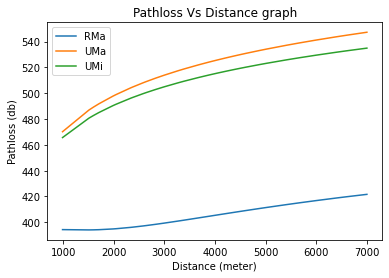

In [15]:
pairs = {
  'RMa': (distance_RMa, pathloss_RMa),
  'UMa': (distance_UMa, pathloss_UMa),
  'UMi': (distance_UMi, pathloss_UMi)
}

for key in pairs:
  distance, pathloss = pairs[key]
  distance_sorted, pathloss_sorted = zip(*sorted(zip(distance, pathloss)))
  plt.plot(np.array(distance_sorted), np.array(pathloss_sorted), label=key)

plt.title('Pathloss Vs Distance graph')
plt.xlabel('Distance (meter)')
plt.ylabel('Pathloss (db)')
plt.legend()
plt.show()

In [16]:
# pathloss_UMa=np.array(pathloss_UMa)
# pathloss_UMi=np.array(pathloss_UMi)
# pathloss_RMa=np.array(pathloss_RMa)
# distance_UMa=np.array(distance_UMa)
# distance_UMi=np.array(distance_UMi)
# distance_RMa=np.array(distance_RMa)

# plt.plot (distance_RMa,pathloss_RMa, label='RMa')
# plt.plot (distance_UMa,pathloss_UMa, label='UMa')
# plt.plot (distance_UMi,pathloss_UMi, label='UMi')
# plt.title('Pathloss Vs Distnace graph')
# plt.xlabel ('Distance(meter)')
# plt.ylabel ('Pathloss (db)')
# plt.legend()
# plt.show()

In [17]:
pathloss_UMa=np.empty([0])
pathloss_UMi=np.empty([0])
pathloss_RMa=np.empty([0])
hBs_UMa=np.empty([0])
hBs_UMi=np.empty([0])
hBs_RMa=np.empty([0])

In [18]:
  def path_loss_UMi(BS_X,BS_Y,BS_Z,UE_X,UE_Y,UE_Z):
##UMi
##LOS,SF=4:

##(10m<=d_2D)<=D_BP:
    h=5
    d_2D=math.sqrt(((BS_X-UE_X)**2)+((BS_Y- UE_Y)**2)+((BS_Z-UE_Z)**2))
    hBs=10
    fc=12e3
    d_3D=math.sqrt(hBs**2+d_2D**2)
    PL1umi=32.4+21*math.log(d_3D)+20*math.log(fc)
    
##(D_BP<=d_2D)<=5000m:
    hBs=10
    hUT=1.5
    hE=1
    hBs1=hBs-hE
    hUT1=hUT-hE
    c=3*10**8
    D_BP= (4*hBs1*hUT1*fc)/c
    PL2umi=32.4+40*math.log(d_3D)+20*math.log(fc)-9.5*math.log((D_BP)**2+(hBs-hUT)**2)
    
    if 10 <=d_2D and d_2D<=D_BP:
        PLUMiLOS=PL1umi
    elif D_BP<=d_2D and  d_2D<=5000:
        PLUMiLOS= PL2umi  
    else:
        PLUMiLOS=1

##NLOS,SF=7.82:
    PL1umiNLOS= 35.3*math.log(d_3D)+22.4+21.3*math.log(fc)-0.3*(hUT-1.5)
    PLUMiNLOS= max(PL2umi,PL1umiNLOS)
    
##Loss Probability:
##d_2D <=18m, PrLOS=1

##18m<d_2D:
    PrLosUmi=(18/d_2D)+math.exp((-(d_2D/36))*(1-(18/d_2D)))
    
##path_loss 
    path_loss_UMi= PL2umi*PrLosUmi+PL1umiNLOS*(1-PrLosUmi)
    
    return path_loss_UMi,hBs

In [19]:
for i in range(len(BS_X)):
    for j in range (len(UE_X)):
        pathlossumi,hBsumi= path_loss_UMi(BS_X[i],BS_Y[i],BS_Z[i],UE_X[j],UE_Y[j],UE_Z[j])
        print("pathloss for umi", pathlossumi, "for BS height",hBsumi)
        pathloss_UMi=np.append(pathloss_UMi,pathlossumi)
        hBs_UMi=np.append(hBs_UMi, hBsumi)
print(pathloss_UMi,hBs_UMi)




pathloss for umi 482.71488187970647 for BS height 10
pathloss for umi 509.1879956978679 for BS height 10
pathloss for umi 490.39939276327016 for BS height 10
pathloss for umi 522.1781948221408 for BS height 10
pathloss for umi 502.88797229757114 for BS height 10
pathloss for umi 465.66355366081444 for BS height 10
pathloss for umi 499.6825152309142 for BS height 10
pathloss for umi 485.0348596870527 for BS height 10
pathloss for umi 515.5912335661467 for BS height 10
pathloss for umi 517.4208473011531 for BS height 10
pathloss for umi 480.69990351377015 for BS height 10
pathloss for umi 527.5412426790679 for BS height 10
pathloss for umi 496.13297042771757 for BS height 10
pathloss for umi 505.0264505459744 for BS height 10
pathloss for umi 520.1697526541466 for BS height 10
pathloss for umi 491.25118245591193 for BS height 10
pathloss for umi 517.2451842910369 for BS height 10
pathloss for umi 491.4773750209507 for BS height 10
pathloss for umi 515.6753585600479 for BS height 10
pathl

In [20]:
def path_loss_UMa(BS_X,BS_Y,BS_Z,UE_X,UE_Y,UE_Z):
##LOS,SF=4:
##(10m<=d_2D)<=D_BP:
    fc=12e3
    h=5
    d_2D=math.sqrt(((BS_X-UE_X)**2)+((BS_Y- UE_Y)**2)+((BS_Z-UE_Z)**2))
    hBs=25
    d_3D=math.sqrt(hBs**2+d_2D**2)
    PL3uma=28.0+22*math.log(d_3D)+20*math.log(fc)
    
##(D_BP<=d_2D) <=5000m:
    hUT=1.5
    hE=1
    hBs1=hBs-hE
    hUT1=hUT-hE
    c=3*10**8
    D_BP= (4*hBs1*hUT1*fc)/c
    PL4uma=28.0+40*math.log(d_3D)+20*math.log(fc)-9*math.log((D_BP)**2+(hBs-hUT)**2)
    
    if 10 <=d_2D and d_2D<=D_BP:
        PLUMALOS=PL3uma
    elif D_BP<=d_2D and  d_2D<=5000:
        PLUMALOS= PL4uma  
    else:
        PLUMALOS=1
        
##NLOS,SF=6:
    PL1NLOSuma=13.54+39.08*math.log(d_3D)+20*math.log(fc)-0.6*(hUT-1.5)
    PLUMANLOS=max(PL4uma,PL1NLOSuma)

##NLOS,SF=7.8 (optional)
##PL_Optional=32.4+20*math.log(fc)+30*math.log(d_3D)

##Loss Probability:
##if d_2D <=18m then PrLOS=1.
##18m<d_2D:
## if hUT<=13m then ChUT=0, and if (13m< hUT<=23m),then ChUT=((hUT-13)/10).^1.5
    ChUT=0
    PrLOSUma=((18/d_2D)+math.exp((-(d_2D/63))*(1-(18/d_2D))))*(1+ChUT*(5/4)*((d_2D/100)**3)*math.exp(-(d_2D/150)))

##Path Loss
    path_loss_UMa= PL4uma*PrLOSUma+PL1NLOSuma*(1-PrLOSUma)
    return path_loss_UMa, hBs

In [21]:
for i in range(len(BS_X)):
    for j in range (len(UE_X)):
        pathlossuma,hBsuma= path_loss_UMa(BS_X[i],BS_Y[i],BS_Z[i],UE_X[j],UE_Y[j],UE_Z[j])
        print("pathloss for uma", pathlossuma, "for BS height",hBsuma)  
        pathloss_UMa=np.append(pathloss_UMa,pathlossuma)
        hBs_UMa=np.append(hBs_UMa, hBsuma)
print(pathloss_UMa,hBs_UMa)

pathloss for uma 489.21787896437917 for BS height 25
pathloss for uma 518.6629561548672 for BS height 25
pathloss for uma 497.77368389148785 for BS height 25
pathloss for uma 533.0866506130363 for BS height 25
pathloss for uma 511.6626463646434 for BS height 25
pathloss for uma 470.20041635986223 for BS height 25
pathloss for uma 508.0993990379 for BS height 25
pathloss for uma 491.80176473525387 for BS height 25
pathloss for uma 525.7744067601889 for BS height 25
pathloss for uma 527.8057882515127 for BS height 25
pathloss for uma 486.9730465316299 for BS height 25
pathloss for uma 539.0380884977671 for BS height 25
pathloss for uma 504.15238082071517 for BS height 25
pathloss for uma 514.0392471387621 for BS height 25
pathloss for uma 530.8573833927567 for BS height 25
pathloss for uma 498.7215678130562 for BS height 25
pathloss for uma 527.6107640821133 for BS height 25
pathloss for uma 498.97326281922886 for BS height 25
pathloss for uma 525.8678144652724 for BS height 25
pathloss 

In [22]:
def path_loss_RMa(BS_X,BS_Y,BS_Z,UE_X,UE_Y,UE_Z):
##LOS,SF=4(PL1),SF=6(PL2)
##10m<=d_2D<=d_BP: 
    fc=12e3
    h=5
    d_2D=math.sqrt(((BS_X-UE_X)**2)+((BS_Y- UE_Y)**2)+((BS_Z-UE_Z)**2))
    hBs=35
    d_3D= math.sqrt(hBs**2+d_2D**2)
    PL1rma=20*math.log((40*math.pi*d_3D*fc)/3)+ min(0.03*h**1.72,10)*math.log(d_3D)-min(0.044*h**1.72,14.77)+0.002*math.log(h)*d_3D
    
##d_BP<=d_2D<=10km:
    hUT=1.5
    c=3*10**8
    d_BP= (2*math.pi*hBs*hUT*fc)/c
    PL2rma= PL1rma*(d_BP)+40*math.log(d_3D/d_BP)

    if 10<=d_2D and d_2D <=d_BP:
        PLRMALOS=PL1rma
    elif d_BP<=d_2D and d_2D <=10000:
        PLRMALOS= PL2rma  
    else:
        PLUMALOS=1

##NLOS,SF=8:
    W=20
    h=5
    PL1NLOSrma= 161.04-7.11*math.log(W)+7.5*math.log(h)-(24.37-3.7*(h/hBs)**2)*math.log(hBs)+(43.42-3.1*math.log(hBs))*(math.log(d_3D)-3)+20*math.log(fc)-(3.2*(math.log(11.75*hUT))**2-4.97)
    PLRMANLOS=max(PL2rma,PL1NLOSrma)

##Loss Probability:
##if d_2D <=10m, PrLOS=1
## if 10m<d_2D:
    PrLOSrma=math.exp(-((d_2D-10)/1000))

##PathLoss:
    path_loss_RMa=PL2rma*PrLOSrma+PL1NLOSrma*(1-PrLOSrma)
    return path_loss_RMa, hBs

In [23]:
for i in range(len(BS_X)):
    for j in range (len(UE_X)):
        pathlossrma,hBsrma= path_loss_RMa(BS_X[i],BS_Y[i],BS_Z[i],UE_X[j],UE_Y[j],UE_Z[j])
        print("pathloss for rma", pathlossrma, "for BS height",hBsrma) 
        pathloss_RMa=np.append(pathloss_RMa,pathlossrma)
        hBs_RMa=np.append(hBs_RMa, hBsrma)
print(pathloss_RMa,hBs_RMa)

pathloss for rma 394.1427963746695 for BS height 35
pathloss for rma 401.57224406295114 for BS height 35
pathloss for rma 394.84337982295324 for BS height 35
pathloss for rma 410.6518622271638 for BS height 35
pathloss for rma 398.40987214710526 for BS height 35
pathloss for rma 394.3187673205889 for BS height 35
pathloss for rma 397.1585821078239 for BS height 35
pathloss for rma 394.26302333372655 for BS height 35
pathloss for rma 405.6741088064964 for BS height 35
pathloss for rma 406.98907340725265 for BS height 35
pathloss for rma 394.0886382281615 for BS height 35
pathloss for rma 415.1103940197415 for BS height 35
pathloss for rma 396.05236701424644 for BS height 35
pathloss for rma 399.379829088428 for BS height 35
pathloss for rma 409.0661946675769 for BS height 35
pathloss for rma 394.98119438181243 for BS height 35
pathloss for rma 406.86036168851047 for BS height 35
pathloss for rma 395.0201103380318 for BS height 35
pathloss for rma 405.7332954775893 for BS height 35
pathl

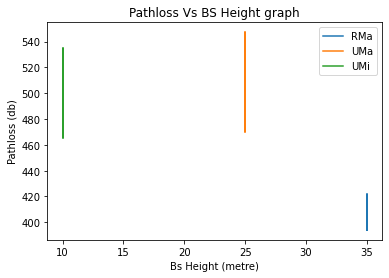

In [24]:
pathloss_UMa=np.array(pathloss_UMa)
pathloss_UMi=np.array(pathloss_UMi)
pathloss_RMa=np.array(pathloss_RMa)
hBs_UMa=np.array(hBs_UMa)
hBs_UMi=np.array(hBs_UMi)
hBs_RMa=np.array(hBs_RMa)
plt.plot (hBs_RMa,pathloss_RMa, label='RMa')
plt.plot (hBs_UMa,pathloss_UMa, label='UMa')
plt.plot (hBs_UMi,pathloss_UMi, label='UMi')
plt.title('Pathloss Vs BS Height graph')
plt.xlabel ('Bs Height (metre)')
plt.ylabel ('Pathloss (db)')
plt.legend()
plt.show()

In [25]:
# for i in range (4):
#     bs1 = BS(radius, max_height=35, carr_freq=12e3)
#     BS_x, BS_y, BS_z = bs1.BS_random_co_ordinates()
#     print ("Bs Co-ordinates=" +str (BS_x)+ "," + str(BS_y)+ "," + str(BS_z))
    
#     path_loss_UMi= bs1.path_loss_UMi()
#     print ("Path Loss for UMi = " +str(path_loss_UMi))
    
#     path_loss_UMa= bs1.path_loss_UMa()
#     print ("Path Loss for UMa = " +str(path_loss_UMa))
    
#     path_loss_RMa= bs1.path_loss_RMa()
#     print ("Path Loss for RMa = " +str(path_loss_RMa))
     
    
# print ("\n")
    
# for i in range (10):
#     ue1 = BS(radius, max_height=1.5, carr_freq=12e3)
#     UE_x,  UE_y, UE_z = ue1.UE_random_co_ordinates()
#     print("UE Co-ordinates=" +str (UE_x)+ "," + str(UE_y)+ "," + str(UE_z))
    
#     path_loss_UMi= ue1.path_loss_UMi()
#     print ("Path Loss for UMi = " +str(path_loss_UMi))
    
#     path_loss_UMa= ue1.path_loss_UMa()
#     print ("Path Loss for UMa = " +str(path_loss_UMa))
    
#     path_loss_RMa= ue1.path_loss_RMa()
#     print ("Path Loss for RMa = " +str(path_loss_RMa))


# import matplotlib.pyplot as plt
# d_2D=math.sqrt(((BS_x-UE_x)**2)+((BS_y- UE_y)**2)+((BS_z-UE_z)**2))
# y1= path_loss_UMi
# y2= path_loss_UMa
# y3= path_loss_RMa
# plt.plot (d_2D,y1, label='UMi')
# plt.plot (d_2D,y2, label='UMa')
# plt.plot (d_2D,y3, label='RMa')
# plt.xlabel ('Distance(meter)')
# plt.ylabel ('Pathloss (db)')
# plt.legend()
# plt.show()
    